In [1]:
%matplotlib inline

import random
import multiprocessing
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from itertools import islice

In [2]:
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset

from estimator import LagLlamaEstimator

In [3]:
class CombinedDataset:
    def __init__(self, datasets, seed=None, weights=None):
        self._seed = seed
        self._datasets = datasets
        self._weights = weights
        n_datasets = len(datasets)
        if weights is None:
            self._weights = [1 / n_datasets] * n_datasets

    def __iter__(self):
        return CombinedDatasetIterator(self._datasets, self._seed, self._weights)
    
    def __len__(self):
        return sum([len(ds) for ds in self._datasets])

In [4]:
class CombinedDatasetIterator:
    def __init__(self, datasets, seed, weights):
        self._datasets = [iter(el) for el in datasets]
        self._weights = weights
        self._rng = random.Random(seed)

    def __next__(self):
        (dataset,) = self._rng.choices(self._datasets, weights=self._weights, k=1)
        return next(dataset)

In [5]:
gluonts_ds = [
    get_dataset("airpassengers").train,
    get_dataset("australian_electricity_demand").train,
    get_dataset("car_parts_without_missing").train,
    get_dataset("cif_2016").train,
    get_dataset("covid_deaths").train,
    get_dataset("electricity").train,
    get_dataset("electricity_weekly").train,
#     get_dataset("exchange_rate").train,
#     get_dataset("fred_md").train,
#     get_dataset("hospital").train,
    get_dataset("kaggle_web_traffic_weekly").train,
    get_dataset("kdd_cup_2018_without_missing").train,
    get_dataset("london_smart_meters_without_missing").train,
    get_dataset("nn5_daily_with_missing").train,
#     get_dataset("nn5_weekly").train,
    get_dataset("pedestrian_counts").train,
    get_dataset("rideshare_without_missing").train,
#     get_dataset("saugeenday").train,
    get_dataset("solar-energy").train,
    get_dataset("solar_10_minutes").train,
    get_dataset("solar_weekly").train,
#     get_dataset("taxi_30min").train,
#     get_dataset("temperature_rain_without_missing").train,
    get_dataset("tourism_monthly").train,
    get_dataset("traffic").train,
#     get_dataset("uber_tlc_daily").train,
#     get_dataset("uber_tlc_hourly").train,
#     get_dataset("vehicle_trips_without_missing").train,
#     get_dataset("weather").train,
#     get_dataset("wiki-rolling_nips").train,
]

In [6]:
dataset = CombinedDataset(gluonts_ds)

In [3]:
estimator = LagLlamaEstimator(
    prediction_length=24,
    context_length=24*4,
    batch_size=64,
    n_layer=2,
    n_predictions=8,
    scaling="std",
    num_batches_per_epoch=100,
    trainer_kwargs=dict(max_epochs=100, accelerator="gpu", precision="bf16-mixed"),
)

/mnt/scratch/kashif/gluon-ts/src/gluonts/time_feature/lag.py:104: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  offset = to_offset(freq_str)
/mnt/scratch/kashif/gluon-ts/src/gluonts/time_feature/lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
/mnt/scratch/kashif/gluon-ts/src/gluonts/time_feature/lag.py:104: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = to_offset(freq_str)
/mnt/scratch/kashif/gluon-ts/src/gluonts/time_feature/lag.py:104: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  offset = to_offset(freq_str)
/mnt/scratch/kashif/gluon-ts/src/gluonts/time_feature/lag.py:104: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  offset = to_offset(freq_str)


In [4]:
predictor = estimator.train(
    training_data=get_dataset("electricity").train, num_workers=0, shuffle_buffer_length=1024, cache_data=True
)

/mnt/scratch/kashif/gluon-ts/src/gluonts/time_feature/_base.py:249: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  offset = to_offset(freq_str)
Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/kashif/.venv/pytorch/lib/python3.12/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
You are using a CUDA device ('NVIDIA GeForce RTX 3090 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params |

Training: |                                                                    | 0/? [00:00<?, ?it/s]

Epoch 0, global step 100: 'train_loss' reached 6.07428 (best 6.07428), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/multi-step-matryoshka/lightning_logs/version_14/checkpoints/epoch=0-step=100.ckpt' as top 1
Epoch 1, global step 200: 'train_loss' reached 5.65036 (best 5.65036), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/multi-step-matryoshka/lightning_logs/version_14/checkpoints/epoch=1-step=200.ckpt' as top 1
Epoch 2, global step 300: 'train_loss' reached 5.53024 (best 5.53024), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/multi-step-matryoshka/lightning_logs/version_14/checkpoints/epoch=2-step=300.ckpt' as top 1
Epoch 3, global step 400: 'train_loss' reached 5.41051 (best 5.41051), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/multi-step-matryoshka/lightning_logs/version_14/checkpoints/epoch=3-step=400.ckpt' as top 1
Epoch 4, global step 500: 'train_loss' reached 5.40169 (best 5.40169), saving model to '/mnt/scratch/kashif/

In [26]:
test_dataset = get_dataset("hospital").test

In [27]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_dataset, predictor=predictor
)

In [28]:
forecasts = list(forecast_it)

In [29]:
tss = list(ts_it)

In [30]:
# num_workers is limited to 10 if cpu has more cores
num_workers = min(multiprocessing.cpu_count(), 10)

evaluator = Evaluator(num_workers=num_workers)
agg_metrics, ts_metrics = evaluator(
    iter(tss), iter(forecasts), num_series=len(test_dataset)
)

Running evaluation: 100%|████████████████████████████████████████████| 767/767 [00:00<00:00, 25235.97it/s]


In [31]:
#greedy
agg_metrics

{'MSE': 12767.217371021754,
 'abs_error': 713158.4427070618,
 'abs_target_sum': 5118873.0,
 'abs_target_mean': 278.0787157757497,
 'seasonal_error': 30.740091264667537,
 'MASE': 1.238815467596879,
 'MAPE': 0.27584407867775534,
 'sMAPE': 0.2384458476469497,
 'MSIS': 10.2787011043044,
 'num_masked_target_values': 0.0,
 'QuantileLoss[0.1]': 435363.8658407212,
 'Coverage[0.1]': 0.24799000434593652,
 'QuantileLoss[0.2]': 601843.8369403839,
 'Coverage[0.2]': 0.3869513255106476,
 'QuantileLoss[0.3]': 687938.9693055153,
 'Coverage[0.3]': 0.4870165145588874,
 'QuantileLoss[0.4]': 720721.6640865325,
 'Coverage[0.4]': 0.5752390265102129,
 'QuantileLoss[0.5]': 713158.4435572624,
 'Coverage[0.5]': 0.6478161668839635,
 'QuantileLoss[0.6]': 661426.7362239838,
 'Coverage[0.6]': 0.7113754889178618,
 'QuantileLoss[0.7]': 583741.7154219628,
 'Coverage[0.7]': 0.7742829204693612,
 'QuantileLoss[0.8]': 466527.6106107711,
 'Coverage[0.8]': 0.836592785745328,
 'QuantileLoss[0.9]': 298445.9449289321,
 'Coverag

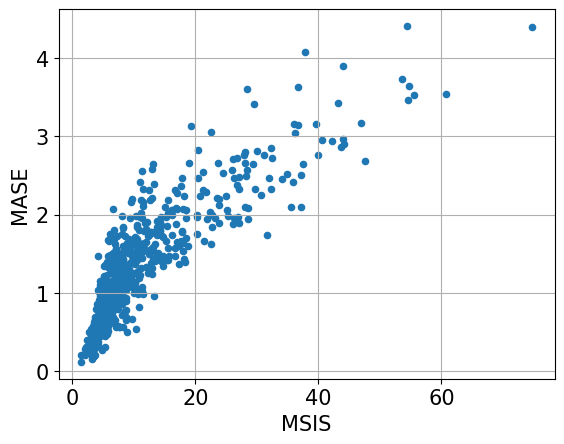

In [32]:
ts_metrics.plot(x="MSIS", y="MASE", kind="scatter")
plt.grid(which="both")
plt.show()

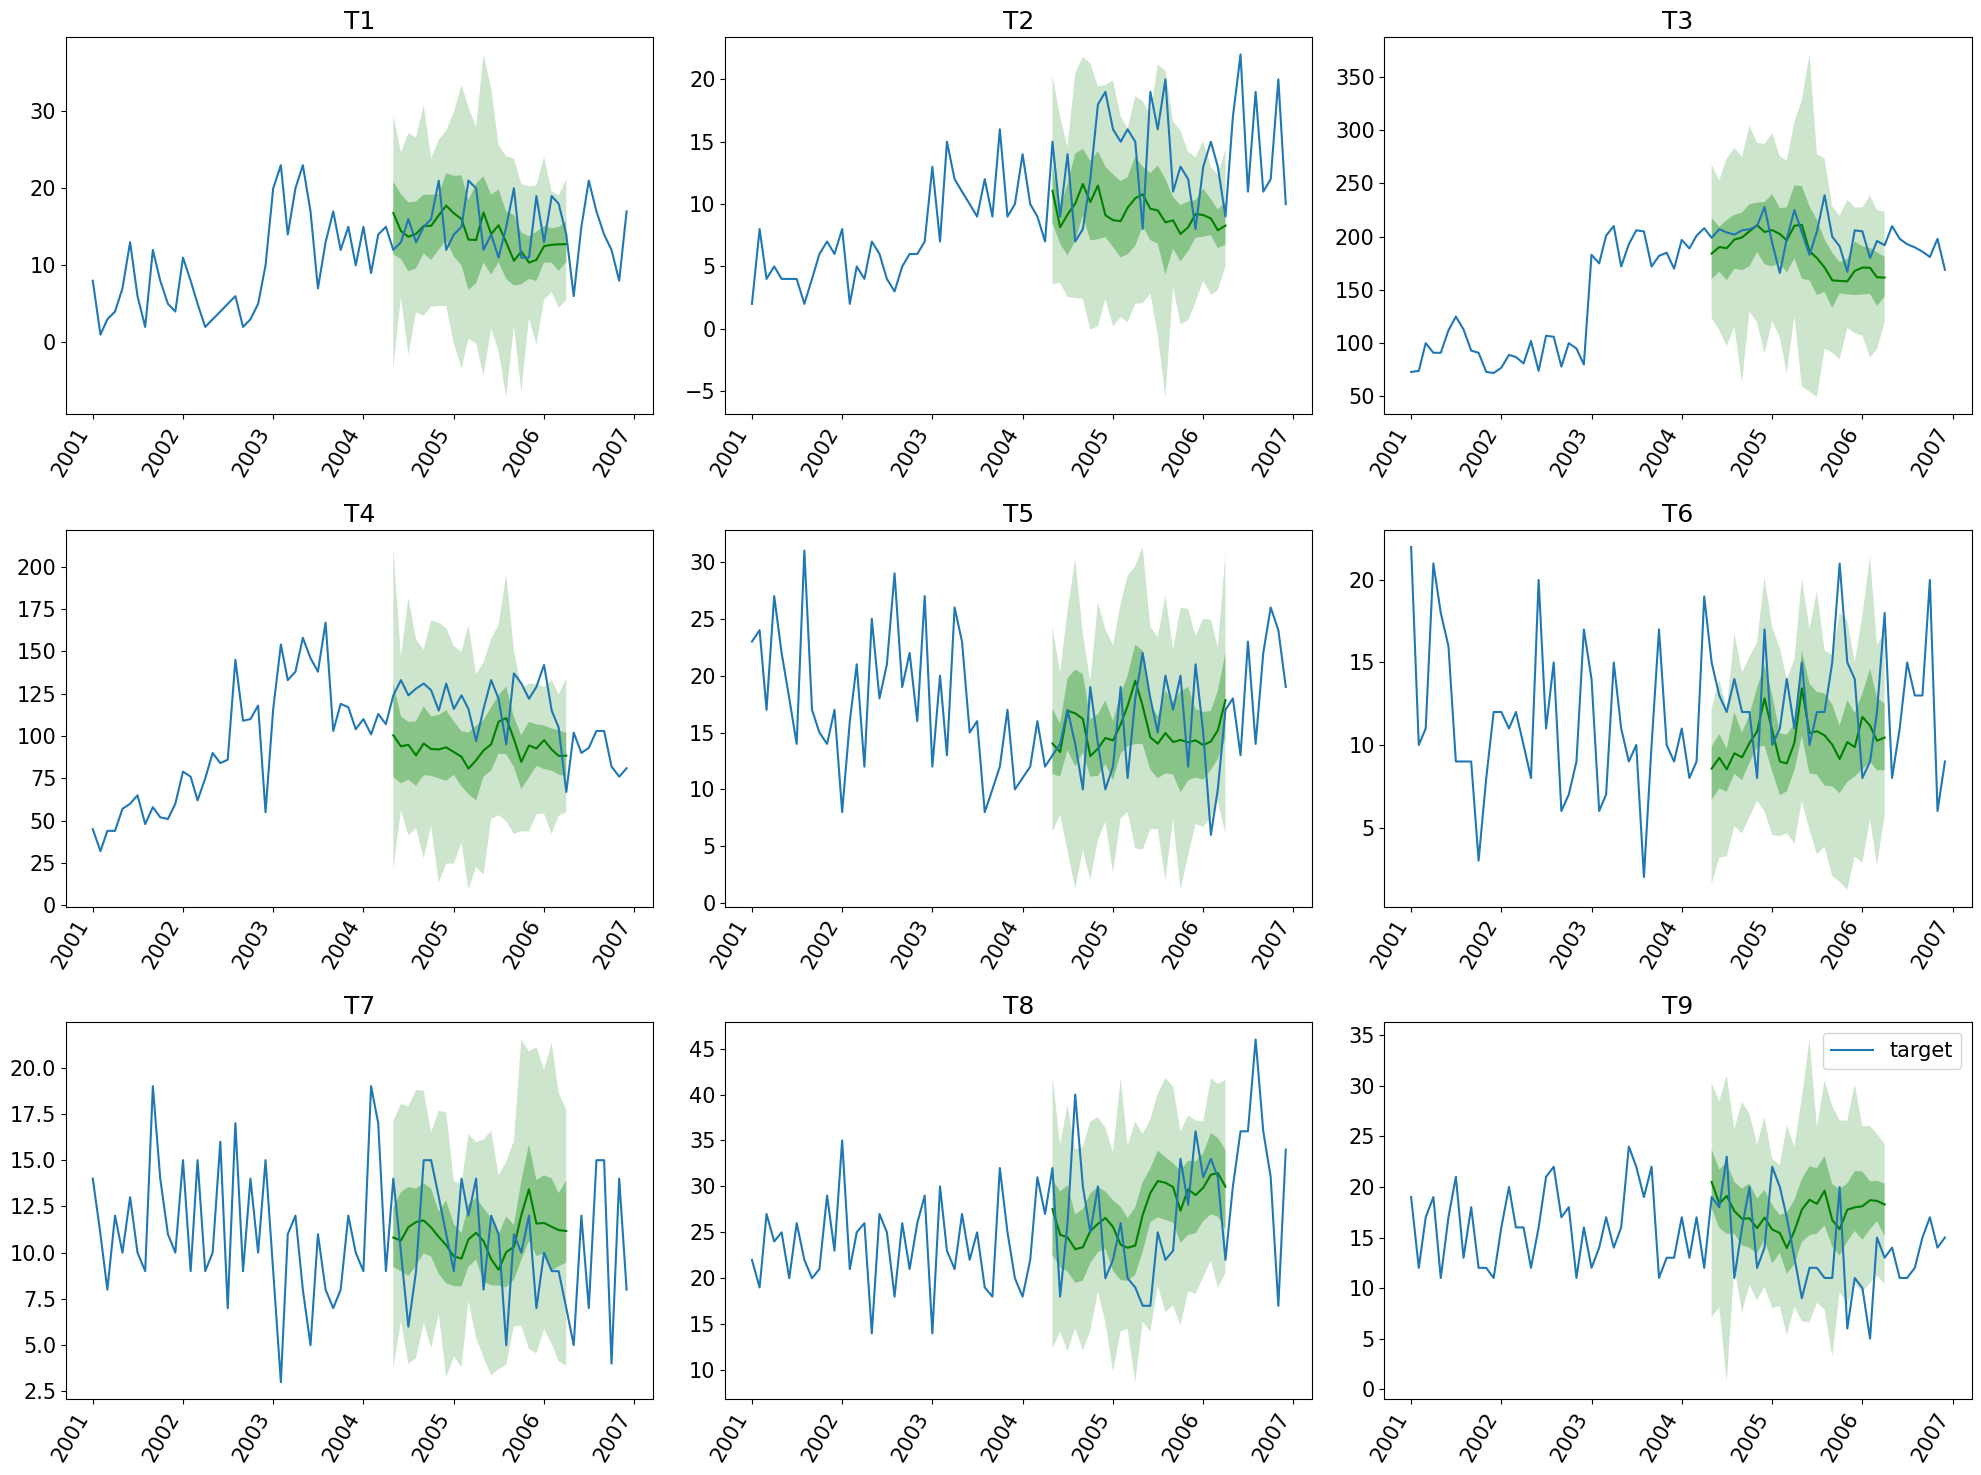

In [33]:
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)
    forecast.plot(color='g')
    ts[-3 * 24:][0].plot(label="target")
    plt.xticks(rotation=60)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

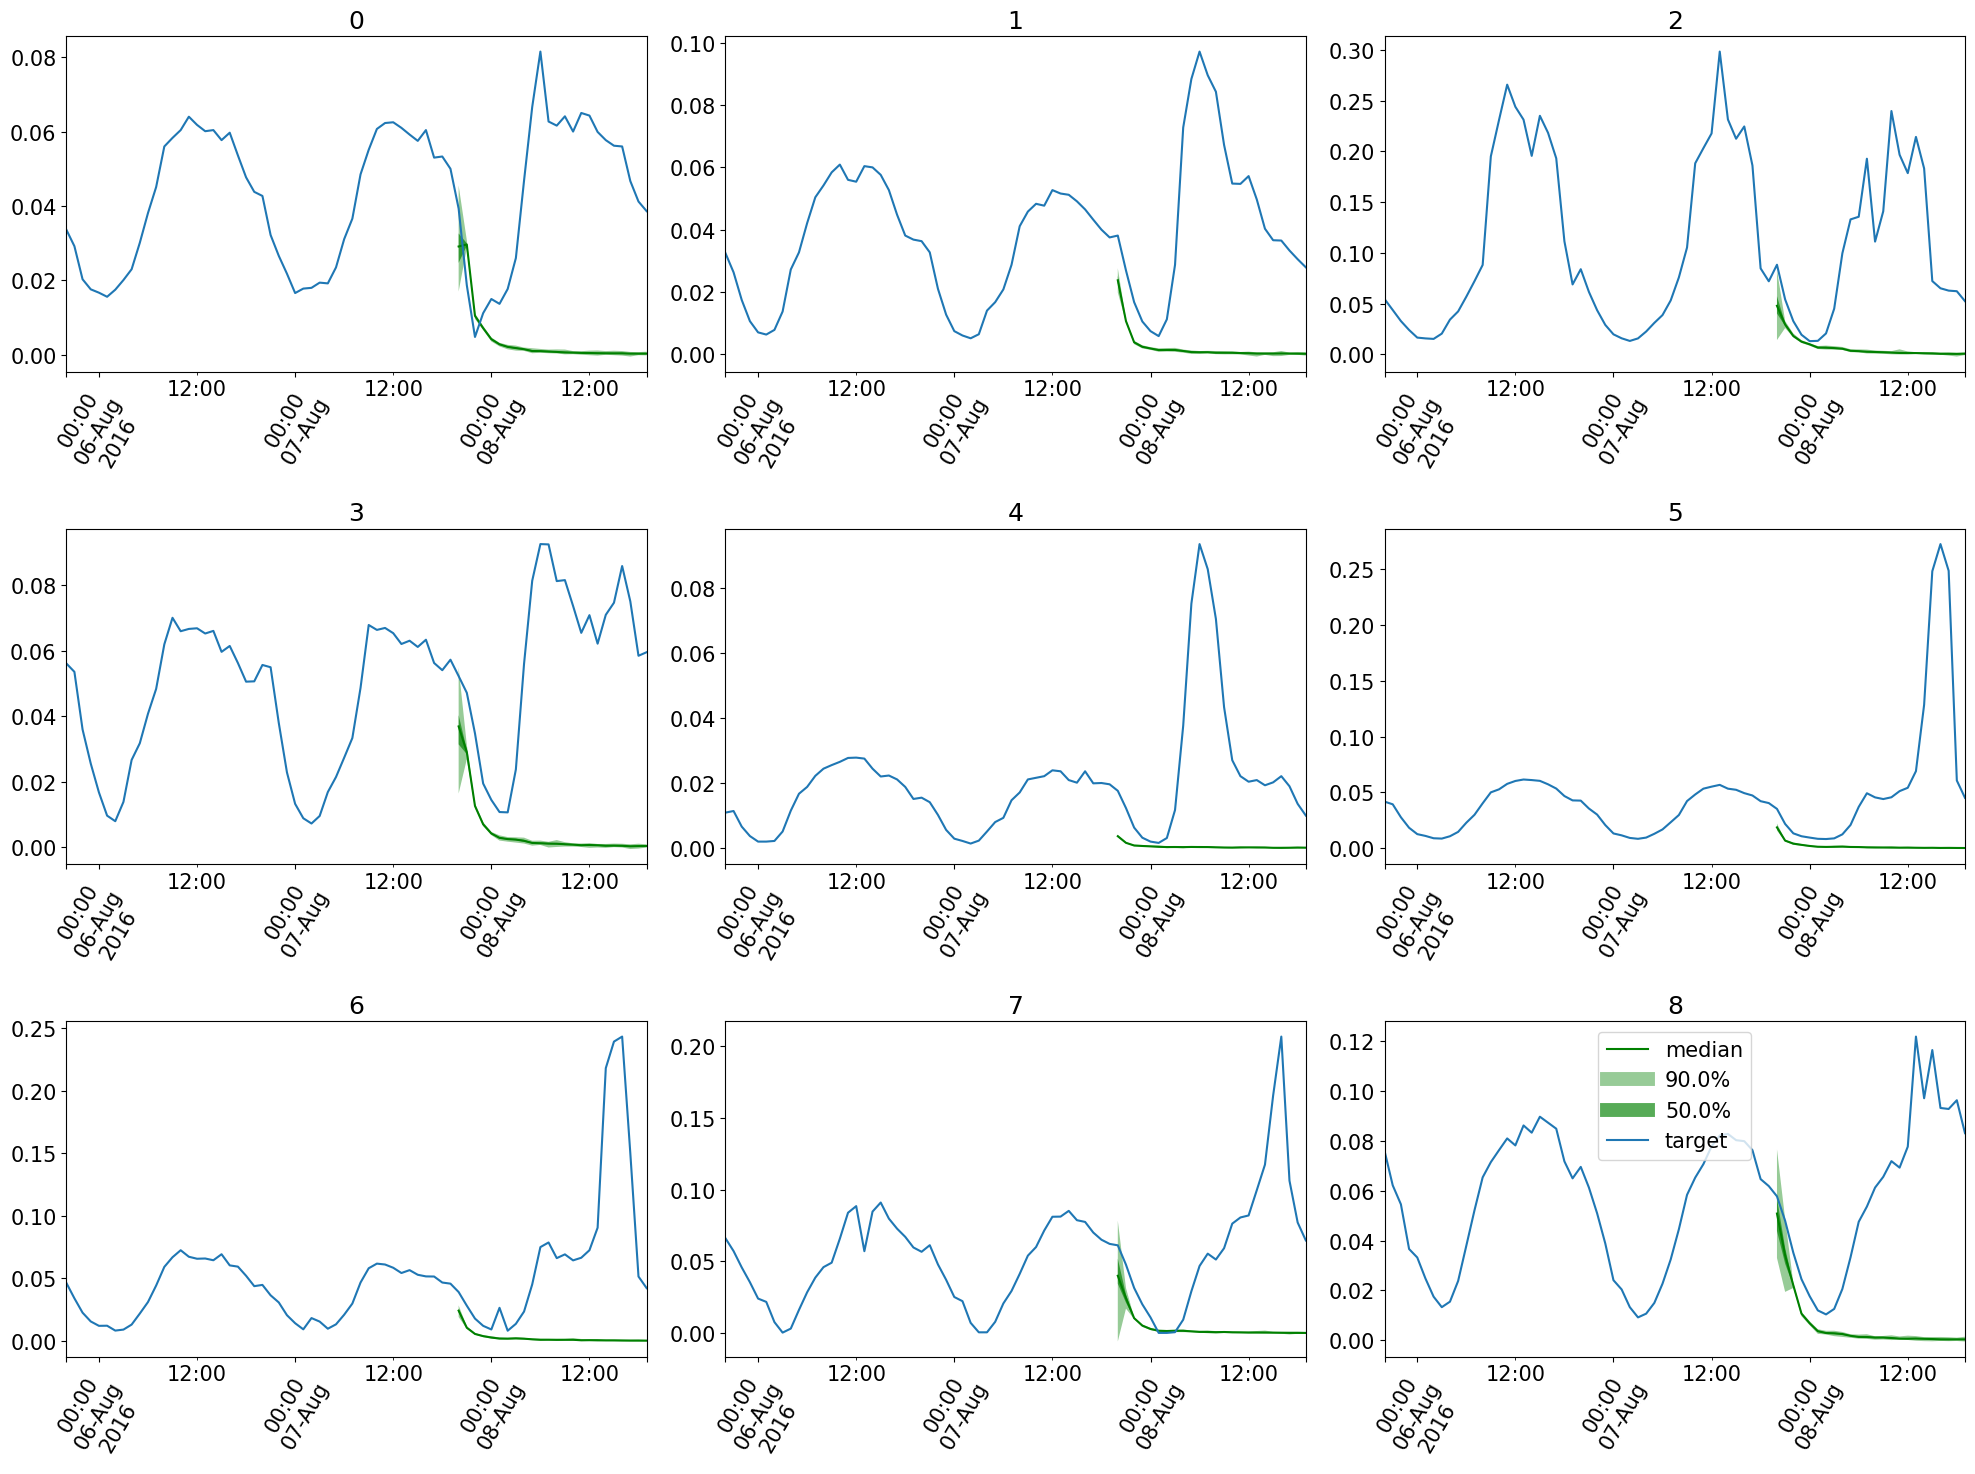

In [68]:
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)
    forecast.plot(color='g')
    ts[-3 * 24:][0].plot(label="target")
    plt.xticks(rotation=60)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

In [10]:
# beam
agg_metrics

{'MSE': 2353700.5849478617,
 'abs_error': 10347671.897188187,
 'abs_target_sum': 128632956.0,
 'abs_target_mean': 2385.272140631954,
 'seasonal_error': 189.49338196116761,
 'MASE': 0.8922449918745382,
 'MAPE': 0.11220455807131616,
 'sMAPE': 0.1165269710200355,
 'MSIS': 12.069460309886567,
 'QuantileLoss[0.1]': 4623474.5003027115,
 'Coverage[0.1]': 0.15873015873015875,
 'QuantileLoss[0.2]': 6818143.679625946,
 'Coverage[0.2]': 0.23221703011422637,
 'QuantileLoss[0.3]': 8406636.595204707,
 'Coverage[0.3]': 0.29175938288087816,
 'QuantileLoss[0.4]': 9575201.4348929,
 'Coverage[0.4]': 0.34625797359442223,
 'QuantileLoss[0.5]': 10347671.921518601,
 'Coverage[0.5]': 0.4009790832220739,
 'QuantileLoss[0.6]': 10781971.85629762,
 'Coverage[0.6]': 0.45202863076694855,
 'QuantileLoss[0.7]': 10792582.533077706,
 'Coverage[0.7]': 0.5083815457647234,
 'QuantileLoss[0.8]': 10251792.43568935,
 'Coverage[0.8]': 0.579105473965287,
 'QuantileLoss[0.9]': 8707283.513710178,
 'Coverage[0.9]': 0.669707758492

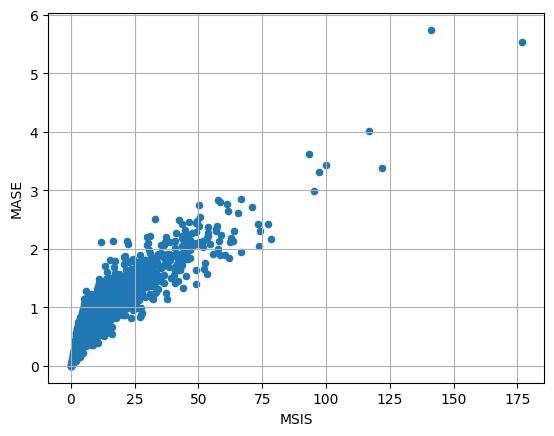

In [11]:
ts_metrics.plot(x="MSIS", y="MASE", kind="scatter")
plt.grid(which="both")
plt.show()

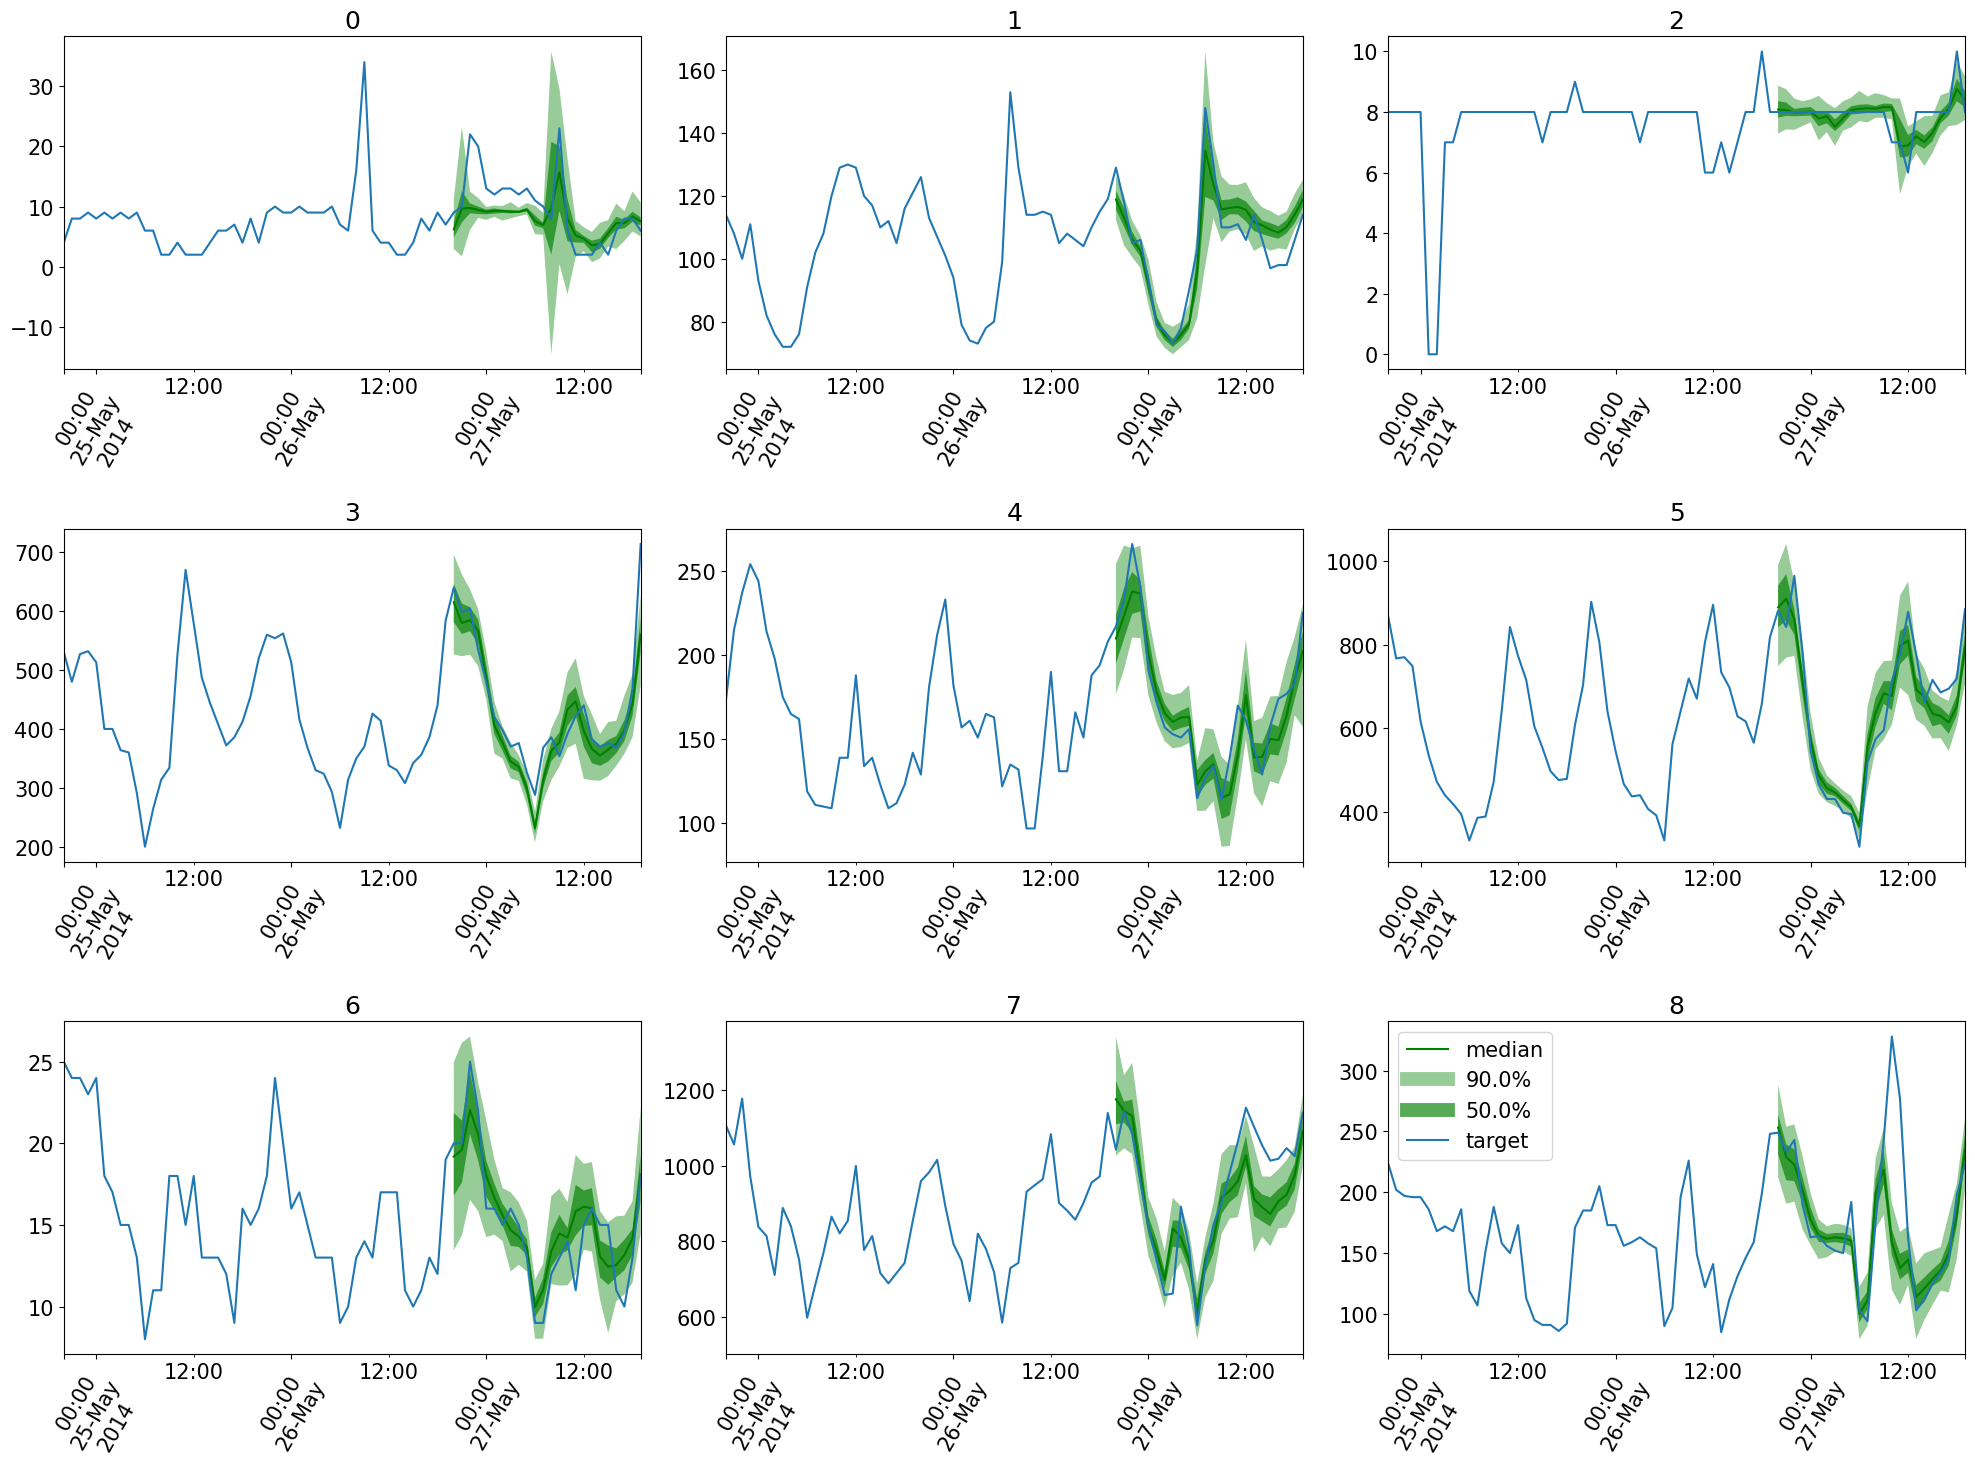

In [12]:
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)
    forecast.plot(color='g')
    ts[-3 * dataset.metadata.prediction_length:][0].plot(label="target")
    plt.xticks(rotation=60)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()